# Load Sleipner Training Data

This notebook demonstrates how to load the generated training data from Azure into a Pytorch data loader.

The data is downloaded from a public Azure storage account. If you (re-)generated the data yourself, replace the account url and container name with your own information. Note that you also need to supply the secret key to the container client (unless you enabled public data access for your container).

## Set up data loader

In [1]:
import torch, os
from dataset import SleipnerDataset4D
import azure.storage.blob
import matplotlib.pyplot as plt

First, we set up the storage client for the Azure blob account that containers the training data. (This is a public container. Downloading the data does not require an Azure account and does not invoke costs for the user.)

In [2]:
# Az storage client (requires azure-storage-blob==12.9.0)
client = azure.storage.blob.ContainerClient(
    account_url='https://sleipnerwno.blob.core.windows.net',
    container_name='sleipner3d'
    );

Note that if you use your personal storage account, you need to supply your storage account secret key:

```
client = azure.storage.blob.ContainerClient(
    account_url='https://myblobaccount.blob.core.windows.net',
    container_name='mycontainer',
    credential='azure_blob_secret_key'
    )
```

Next, we create the Pytorch data loader:

In [3]:
# Sleipner dataset
idx = torch.linspace(1, 4000, 4000, dtype=torch.int32).long()
train_data = SleipnerDataset4D(
    index = idx, 
    client = client, 
    container = 'sleipner3d', 
    path = 'dataset', 
    shape = (64, 60, 60), 
    nt = 30,
    normalize = True
    );

Once we index the data loader (or iterate over it), the corresponding data sample is downloaded from the blob container:

In [4]:
idx1 = 100
x1, y1 = train_data[idx1];

The data is of the following shape:

- `x, y: [ batch size x nx x ny x nz x nt x channel ]`

- Input `x` has two channels that represent (vertical) permeability and depth.

- Output `y` has one channel representing CO2 saturation.

We can plot the training pair as follows:

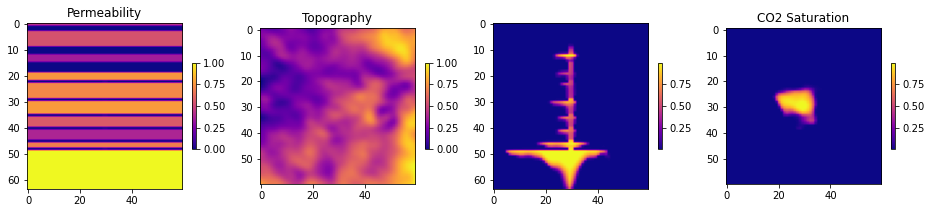

In [5]:
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
plt.imshow(x1[:,30,:,-1,0], cmap="plasma")
plt.colorbar(shrink=.4)
plt.title("Permeability")
plt.subplot(1,4,2)
plt.imshow(x1[0,:,:,-1,1], cmap="plasma")
plt.colorbar(shrink=.4)
plt.title("Topography")
plt.subplot(1,4,3)
plt.imshow(y1[:,30,:,-1,0], cmap="plasma")
plt.colorbar(shrink=.4)
plt.subplot(1,4,4)
plt.imshow(y1[54,:,:,-1,0], cmap="plasma")
plt.colorbar(shrink=.4)
plt.title("CO2 Saturation");

Let's plot another sample from the data set:

In [6]:
idx2 = 101
x2, y2 = train_data[idx2];

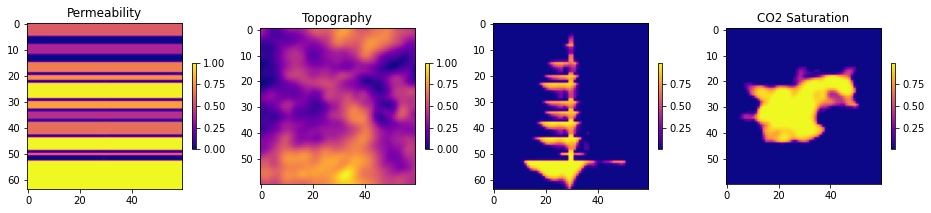

In [7]:
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
plt.imshow(x2[:,30,:,-1,0], cmap="plasma")
plt.colorbar(shrink=.4)
plt.title("Permeability")
plt.subplot(1,4,2)
plt.imshow(x2[0,:,:,-1,1], cmap="plasma")
plt.colorbar(shrink=.4)
plt.title("Topography")
plt.subplot(1,4,3)
plt.imshow(y2[:,30,:,-1,0], cmap="plasma")
plt.colorbar(shrink=.4)
plt.subplot(1,4,4)
plt.imshow(y2[54,:,:,-1,0], cmap="plasma")
plt.colorbar(shrink=.4)
plt.title("CO2 Saturation");

## Copyright 

------------------------------------------------------------------------------------------
Copyright (c) Microsoft Corporation. All rights reserved.
Licensed under the MIT License (MIT). See LICENSE in the repo root for license information.
------------------------------------------------------------------------------------------